In [2]:
import numpy as np
from mayavi import mlab
import matplotlib.pyplot as plt
import pickle
import horus as ho

In [3]:
from simsopt.configs import get_w7x_data

In [4]:
w7x = get_w7x_data()

In [5]:
from simsopt.field import Current

In [6]:
# GYM00+1750
currents = [Current(1.109484) * 1e6 for _ in range(5)]
currents.append(Current(-0.3661) * 1e6)
currents.append(Current(-0.3661) * 1e6)

# # 
# currents = [Current(1.109484) * 1e6 for _ in range(5)]
# currents.append(Current(-0.3661) * 1e6)
# currents.append(Current(-0.3661) * 1e6)

# currents = [Current(1.109484) * 1e6 for _ in range(5)]
# currents.append(Current(-0.3661) * 1e6)
# currents.append(Current(-0.3661) * 1e6)

In [7]:
bs, bsh, (nfp, coils, ma, sc_fieldline) = ho.stellarator(w7x[0], currents, w7x[2], nfp=5, surface_radius=2, degree=3, n=)

In [20]:
bs.coils

In [21]:
coils

#### Plot the current difference

In [ ]:
curr_diff = []
for actual, base in zip(currents,  w7x[1]):
    print(base.current, " | ", actual.current_to_scale.current * 1e6)
    curr_diff.append(actual.current_to_scale.current * 1e6 - base.current)

In [ ]:
curr_diff

In [ ]:
cmap = plt.colormaps['RdBu']
norm = plt.Normalize(min(curr_diff), max(curr_diff))
colors = cmap(norm(curr_diff))
colors = colors[:, :3]

In [ ]:
def rep(data):
            if close:
                return np.concatenate((data, [data[0]]))
            else:
                return data

In [ ]:
# Assuming curr_diff is a list of differences in currents
# Normalize curr_diff to the range [0, 1] for coloring

# Plot the coils
for i, coil in enumerate(coils):
    c


mlab.colorbar(orientation='vertical', title='Current Difference')
mlab.show()

In [ ]:
from mayavi import mlab
for i, coil in enumerate(coils):
    coil.plot(engine="mayavi", show=False, color=tuple(colors[i%7]))

# get the current lut manager
mlab.colorbar(orientation='vertical', title='Current Difference')
mlab.show()

#### Poincare

In [ ]:
for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.show()

In [ ]:
phis = [0]    #[(i / 4) * (2 * np.pi / nfp) for i in range(4)]

nfieldlines = 1
Rs = np.linspace(6.05, 6.2, nfieldlines)
Zs = [ma.gamma()[0, 2] for _ in range(nfieldlines)]
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

nfieldlines = 2
p1 = np.array([5.6144507858315915, -0.8067790944375764])
p2 = np.array([5.78, -0.6])
Rs = np.linspace(p1[0], p2[0], nfieldlines)
Zs = np.linspace(p1[1], p2[1], nfieldlines)
Rs, Zs = np.meshgrid(Rs, Zs)
RZs2 = np.array([[r, z] for r, z in zip(Rs.flatten(), Zs.flatten())])

RZs = np.concatenate((RZs, RZs2))

In [ ]:
ax.plot(RZs[:, 0], RZs[:, 1], '+')
fig

In [ ]:
tys, phis = ho.poincare(bsh, RZs, phis, sc_fieldline, tol = 1e-10, plot=False)

In [ ]:
_, _, fig, ax = ho.poincare(bsh, RZs, phis, sc_fieldline, tol = 1e-10)

In [ ]:
for col in ax[0,0].collections:
    col.set_color('black')
    col.set_sizes([0.5])

In [ ]:
fig

In [ ]:
# import pickle
# pickle.dump(fig, open("../output/poincare_GYM000+1750_chaotic_black.pickle", "wb"))

#### Finding fix-point

In [8]:
fig = pickle.load(open("../../runs/w7x-gym00-1750/W7X_GYM000-1750_poincare_black.pkl", "rb"))
ax = fig.get_axes()[0]
plt.show()

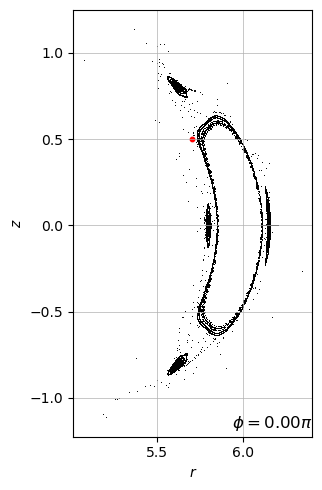

In [9]:
# guess = [5.6, 0.8] # O point
guess = [5.7, 0.5] # X point
# guess = [5.78, -0.6]
ax.scatter(guess[0], guess[1], c='r', s=10)
fig

In [10]:
from pyoculus.solvers import FixedPoint
from pyoculus.problems import SimsoptBfieldProblem
ps = SimsoptBfieldProblem(ma.gamma()[0, 0], 0, 5, bs, bsh)

In [ ]:
gamma = ho.trace(bs, 40*2*np.pi, [5.72, 0, 0.68], tol=1e-9)

In [ ]:
from mayavi import mlab
for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.plot3d(gamma[0, :], gamma[1, :], gamma[2, :], tube_radius=0.01, color=(0, 0, 1))

mlab.show()

In [11]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-9

pparams = dict()
pparams["nrestart"] = 0
pparams["tol"] = 1e-18
pparams['niter'] = 100

fp = FixedPoint(ps, pparams, integrator_params=iparams)
fp.compute(guess=guess, pp=5, qq=4, sbegin=5.2, send=6.2, checkonly=True)

0 - [DeltaR, DeltaZ] : [ 0.01067771 -0.06341708] - dtheta : 0.14843063159343606
0 - [StepR, StepZ]: [-0.01812309  0.05665339]
1 - RZ : [5.68187691 0.55665339] - rhotheta : [0.6172635  2.01765653]
1 - [DeltaR, DeltaZ] : [ 0.01083827 -0.02350714] - dtheta : 0.08364689840943207
1 - [StepR, StepZ]: [ 0.01740229 -0.0295264 ]
2 - RZ : [5.69927919 0.52712699] - rhotheta : [0.58312357 2.01262481]
2 - [DeltaR, DeltaZ] : [0.00032629 0.00093294] - dtheta : 0.0819935308629014
2 - [StepR, StepZ]: [ 0.00026283 -0.00146953]
3 - RZ : [5.69954203 0.52565746] - rhotheta : [0.5816829  2.01329659]
3 - [DeltaR, DeltaZ] : [ 1.73175420e-05 -3.21409526e-05] - dtheta : 0.08382645504772412
3 - [StepR, StepZ]: [ 2.79427976e-05 -5.41019902e-05]
4 - RZ : [5.69956997 0.52560336] - rhotheta : [0.58162205 2.01329301]
4 - [DeltaR, DeltaZ] : [5.24195798e-10 4.28663072e-09] - dtheta : 0.08383408961398597
4 - [StepR, StepZ]: [ 1.36522793e-10 -3.54856111e-09]
5 - RZ : [5.69956997 0.52560335] - rhotheta : [0.58162204 2.013

In [12]:
results = [list(p) for p in zip(fp.x, fp.y, fp.z)]

In [13]:
results

[[5.699569970079714, 0.0, 0.5256033543632022],
 [5.699569969627196, 0.0, -0.5256033556806109],
 [5.883462106296903, 0.0, -0.6556749688793713],
 [5.883462104858263, 0.0, 0.6556749704020348],
 [5.699569970209859, 0.0, 0.5256033541824883]]

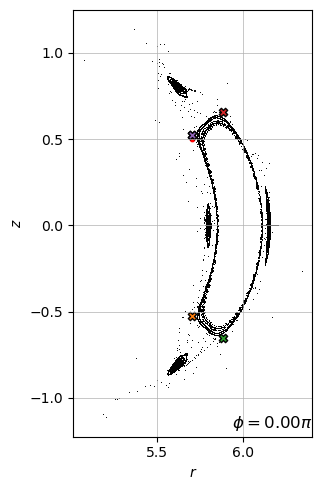

In [14]:
for rr in results:
    ax.scatter(rr[0], rr[2], marker="X", edgecolors="black", linewidths=1)
fig

#### Tracing stable and unstable manifolds

In [15]:
fig = pickle.load(open("../../runs/w7x-gym00-1750/W7X_GYM000-1750_poincare_chaotic_black.pkl", "rb"))
ax = fig.get_axes()[0]

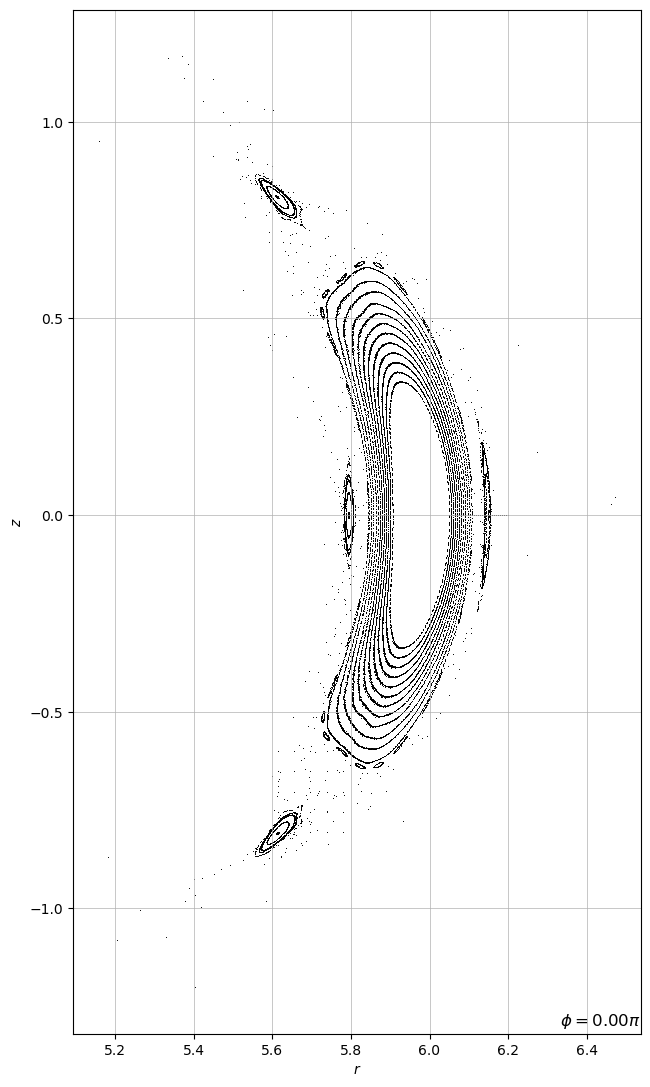

In [16]:
fig.set_size_inches(12, 12)
fig

In [17]:
from pyoculus.solvers import Manifold

In [18]:
iparam = dict()
iparam["rtol"] = 1e-12

mp = Manifold(fp, ps, integrator_params=iparam)

In [52]:
mp.choose(0, 1, ["u+","s+"], [1, 1])

In [69]:
mp.compute(nintersect = 6, epsilon= 1e-3, neps = 30)

2024-05-14 14:53:51 [info     ] Computing unstable manifold with postive epsilon...


c:\Users\Ludovic\miniforge3\envs\simsopt\lib\site-packages\scipy\integrate\_ode.py:431: UserWarning: dopri5: step size becomes too small
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


Exception: Integration failed

In [ ]:
mp.plot(ax=ax)

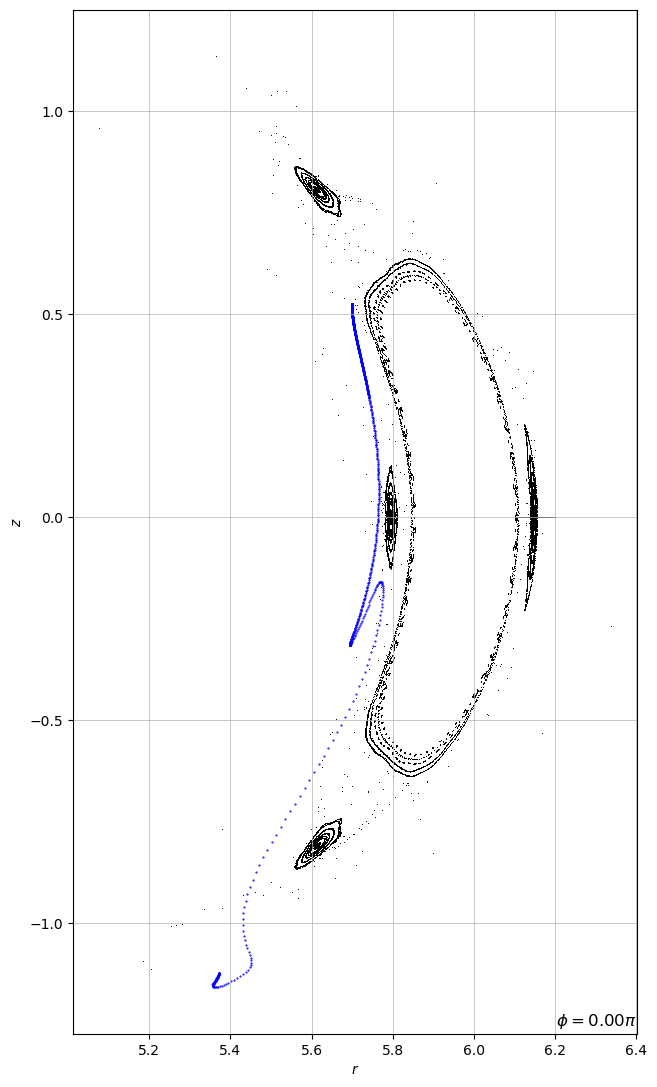

In [ ]:
fig

In [53]:
mp.error_linear_regime(9e-2, mp.rfp_s, mp.vector_s, direction=-1)

6.912908233114301e-05

In [54]:
mp.integrate_single(mp.rfp_s, 4, -1, ret_jacobian=False)

array([ 5.70757453, -0.45613055])

In [55]:
mp.integrate_single(mp.rfp_s, 4, -1, ret_jacobian=True)

(array([ 5.69956997, -0.52560336]),
 array([[  5.35366612,  -2.78577294],
        [-78.46968895,  41.01838471]]))

In [56]:
eps_s_1, eps_u_1 = mp.find_homoclinic(9e-2, 9e-2, jac=False)

2024-05-14 14:43:31 [debug    ] Guess - 0.09, 0.09
2024-05-14 14:43:31 [debug    ] Bounds - ((0.09, 0.92704986912202), (0.09, 0.9270498785500697))
2024-05-14 14:43:31 [debug    ] n_s, n_u - 1, 1
2024-05-14 14:43:31 [debug    ] Inside : (0.08999999999999998, 0.08999999999999998)
2024-05-14 14:43:32 [debug    ] Inside : (0.08999999999999998, 0.08999999999999998)
2024-05-14 14:43:33 [debug    ] Inside : (0.08999999999999998, 0.08999999999999998)
2024-05-14 14:43:34 [debug    ] Inside : (0.09000000322930674, 0.08999999999999998)
2024-05-14 14:43:35 [debug    ] Inside : (0.08999999999999998, 0.09000000322930674)
2024-05-14 14:43:36 [debug    ] Inside : (0.07114797133177651, 0.03882256997079164)
2024-05-14 14:43:37 [debug    ] Inside : (0.0736768010459334, 0.04423018844025838)
2024-05-14 14:43:38 [debug    ] Inside : (0.07378549937139353, 0.049888589672045805)
2024-05-14 14:43:39 [debug    ] Inside : (0.07206656552188108, 0.05091611623803564)
2024-05-14 14:43:39 [debug    ] Inside : (0.06007

In [ ]:
guess_2 = [eps_s_1*np.power(mp.lambda_s, 1/2), eps_u_1*np.power(mp.lambda_u, 1/2)]
print(f"2nd initial guess: {guess_2}")
eps_s_2, eps_u_2 = mp.find_homoclinic(guess_2[0], guess_2[1])

In [65]:
marker = ["+", "o"] #, "s", "p", "P", "*", "X", "D", "d", "^", "v", "<", ">"]
for i, clinic in enumerate(mp.clinics):
    eps_s_i, eps_u_i = clinic[1:3]

    n_u = 3
    # hs_i = mp.integrate(mp.rfp_s + eps_s_i * mp.vector_s, n_s, -1)
    hu_i = mp.integrate(mp.rfp_u + eps_u_i * mp.vector_u, n_u, 1)
    # ax.scatter(hs_i[0,:], hs_i[1,:], marker=marker[i], color="purple", zorder=10)
    ax.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10)

C:\Users\Ludovic\AppData\Local\Temp\ipykernel_27636\2409635613.py:9: UserWarning: You passed a edgecolor/edgecolors ('cyan') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10)


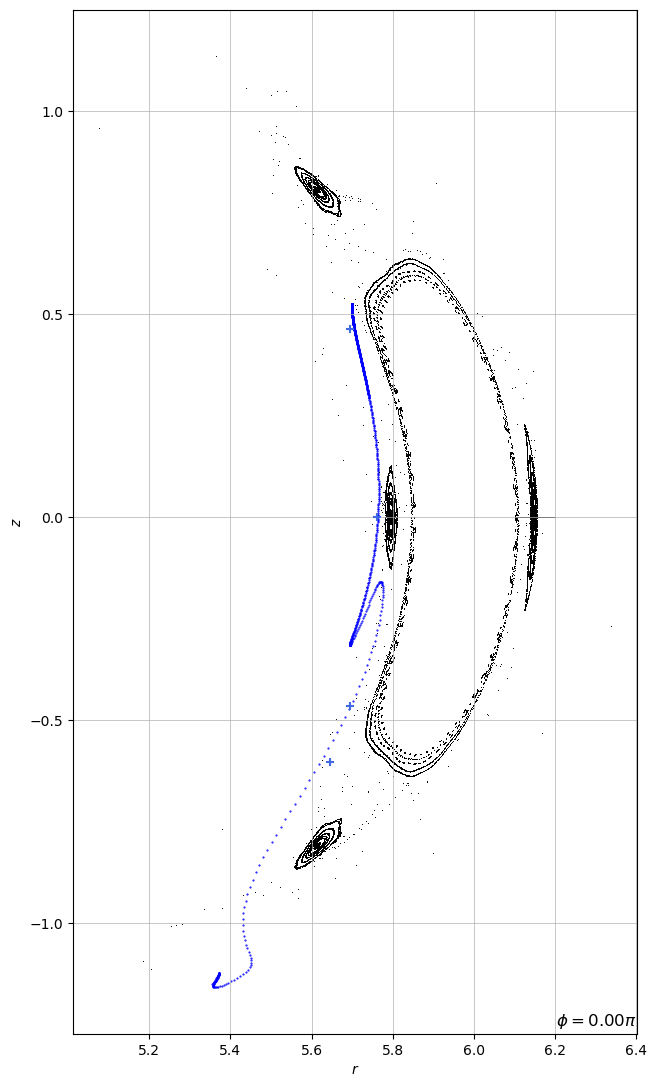

In [66]:
fig

In [ ]:
mp.clinics

In [ ]:
mp.fixedpoint.qq

In [ ]:
mp.plot(ax)

In [ ]:
print(ev_h1, ev_h2)

In [ ]:
ev_h1 - ev_h2

In [ ]:
ev_h1 = mp.rfp_u + mp.clinics[0][2] * mp.vector_u
ev_h2 = mp.rfp_s + mp.clinics[0][1] * mp.vector_s

for i in range(7):
    if i > 0:
        ev_h1 = mp.integrate_single(ev_h1, 1, 1, ret_jacobian=False)
        ev_h2 = mp.integrate_single(ev_h2, 1, -1, ret_jacobian=False)
    ax.scatter(ev_h1[0], ev_h1[1], marker="o", edgecolors="black", color = "blue", linewidths=1, label=f"h1 {i}")
    ax.scatter(ev_h2[0], ev_h2[1], marker="o", edgecolors="black", color = "orange", linewidths=1, label=f"h2 {i}")

ax.legend()
fig

In [ ]:
are = mp.resonance_area(1, 6, n_transit=0)
(are[0] - are[1])/2

In [ ]:
ev_h1 = mp.clinics[0][0]
ev_h2 = mp.clinics[1][0]
ax.scatter(ev_h1[0], ev_h1[1], marker="o", edgecolors="black", linewidths=1, label=f"h1 0")
ax.scatter(ev_h2[0], ev_h2[1], marker="o", edgecolors="black", linewidths=1, label=f"h2 0")

ev_h1 = mp.integrate_single(ev_h1, 1, 1, ret_jacobian=False)
ev_h2 = mp.integrate_single(ev_h2, 1, 1, ret_jacobian=False)
ax.scatter(ev_h1[0], ev_h1[1], marker="o", edgecolors="black", linewidths=1, label=f"h1 1")
ax.scatter(ev_h2[0], ev_h2[1], marker="o", edgecolors="black", linewidths=1, label=f"h2 1")


ev_h1 = mp.integrate_single(ev_h1, 1, -1, ret_jacobian=False)
ev_h2 = mp.integrate_single(ev_h2, 1, -1, ret_jacobian=False)
ax.scatter(ev_h1[0], ev_h1[1], marker="o", edgecolors="black", linewidths=1, label=f"h1 2")
ax.scatter(ev_h2[0], ev_h2[1], marker="o", edgecolors="black", linewidths=1, label=f"h2 2")

fig